In [ ]:
import numpy as np
import joblib
import os


class Perceptron:
  def __init__(self, eta: float=None, epochs: int=None):
    self.weights = np.random.randn(3)*1e-4
    self.eta = eta
    self.epochs = epochs
    if eta is not None and epochs is not None:
      print(f"Initialize weight before training: \n{self.weights}")

  def _z_outcome(self, inputs, weights):
    return np.dot(inputs, weights)

  def activation_function(self, z):
    return np.where(z> 0, 1, 0)

  def fit(self, X, y):
    if self.eta is None or self.epochs is None:
      raise ValueError("Learning rate (eta) and epochs must be set before training")

    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"Epoch >> {epoch + 1}")
      print("--"*10)

      z = self._z_outcome(X_with_bias, self.weights)
      y_hat = self.activation_function(z)
      self.error = y - y_hat

      print(f"Predicted value after forward pass: \n{y_hat}")
      print(f"Error \n{self.error}")

      self.weights += self.eta*np.dot(X_with_bias.T, self.error)

      print(f"Updated weights after epoch: {epoch +1}/{self.epochs}: \n{self.weights}")
      print("##"*10)

  def predict(self, X):
    # Add bias term to input data
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    z = self._z_outcome(X_with_bias, self.weights)
    return self.activation_function(z)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"n\Total Loss: {total_loss}\n")
    return total_loss

  def save(self, filename, model_dir="model"):
    os.makedirs(model_dir, exist_ok=True)
    model_file_path = os.path.join(model_dir, filename)
    joblib.dump(self, model_file_path)

  def load(self, filepath):
    return joblib.load(filepath)


In [ ]:
def prepare_data(df, target_col="y"):
  X = df.drop(target_col, axis=1)

  y = df[target_col]

  return X, y



In [ ]:
import pandas as pd

AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
X, y = prepare_data(df_AND)
ETA = 0.1
EPOCHS = 10
model_and = Perceptron(eta=ETA, epochs=EPOCHS)
model_and.fit(X,y)
_ = model_and.total_loss()

Initialize weight before training: 
[2.28091962e-06 1.27965688e-04 1.44758736e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
Epoch >> 1
--------------------
Predicted value after forward pass: 
[0 0 0 0]
Error 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.10000228  0.10012797 -0.09985524]
####################
--------------------
Epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[2.28091962e-06 1.27965688e-04 2.00144759e-01]
####################
--------------------
Epoch >> 3
--------------------
Predicted value after forward pass: 
[0 0 0 0]
Error 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[0.10000228 0.10012797 0.10014476]
####################
--------------------
Epoch >> 4
--------------------
Predicted value after forwa

In [ ]:
OR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
X, y = prepare_data(df_OR)
ETA = 0.1
EPOCHS = 10
model_or = Perceptron(eta=ETA, epochs=EPOCHS)
model_or.fit(X,y)
_ = model_or.total_loss()

Initialize weight before training: 
[-1.43383558e-04 -2.06137007e-05 -5.92258273e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
Epoch >> 1
--------------------
Predicted value after forward pass: 
[1 1 0 0]
Error 
0   -1
1    0
2    1
3    1
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.19985662  0.09997939 -0.10005923]
####################
--------------------
Epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[ 1.99856616e-01  9.99793863e-02 -5.92258273e-05]
####################
--------------------
Epoch >> 3
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[0.19985662 0.09997939 0.09994077]
####################
--------------------
Epoch >> 4
--------------------
Predicted value after

In [ ]:
XOR ={
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
X, y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10
model_xor = Perceptron(eta=ETA, epochs=EPOCHS)
model_xor.fit(X,y)
_ = model_xor.total_loss()

Initialize weight before training: 
[-1.16644110e-04  6.82505122e-05  1.22255465e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
Epoch >> 1
--------------------
Predicted value after forward pass: 
[0 0 0 0]
Error 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 1/10: 
[ 0.09988336  0.10006825 -0.19987774]
####################
--------------------
Epoch >> 2
--------------------
Predicted value after forward pass: 
[1 1 1 1]
Error 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epoch: 2/10: 
[-1.16644110e-04  6.82505122e-05  1.22255465e-04]
####################
--------------------
Epoch >> 3
--------------------
Predicted value after forward pass: 
[0 0 0 0]
Error 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epoch: 3/10: 
[ 0.09988336  0.10006825 -0.19987774]
####################
--------------------
Epoch >> 4
--------------------
Predicted value af

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import os

def save_plot(df, model, filename="plot.png", plot_dir="plots", show_plot=True):
  # Validate dataframe colours
  required_columns = {"x1", "x2", "y"}
  if not required_columns.issubset(df.columns):
    raise ValueError(f"DataFrame must contain {required_columns}")

  def _create_base_plot(df):
    plt.scatter(df["x1"], df["x2"], c=df["y"], s=100, cmap="coolwarm")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf()
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classifier, resolution=0.02):
    colors =["blue", "red"]
    cmap = ListedColormap(colors)

    x1=X["x1"]
    x2=X["x2"]

    x1_min, x1_max = x1.min() -1, x1.max() +1
    x2_min, x2_max = x2.min() -1, x2.max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    y_hat = classifier.predict(grid_points)
    y_hat = y_hat.reshape(xx1.shape)

    plt.contourf(xx1, xx2, y_hat, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

  # Prepare data
  X, y = prepare_data(df)

  # Create plot
  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  # Save the plot
  os.makedirs(plot_dir, exist_ok=True)
  plot_path = os.path.abspath(os.path.join(plot_dir, filename))
  plt.savefig(plot_path)

  # Show if the plot if requested
  if show_plot:
    plt.show()



  # Close the plot and free memory
  plt.close()







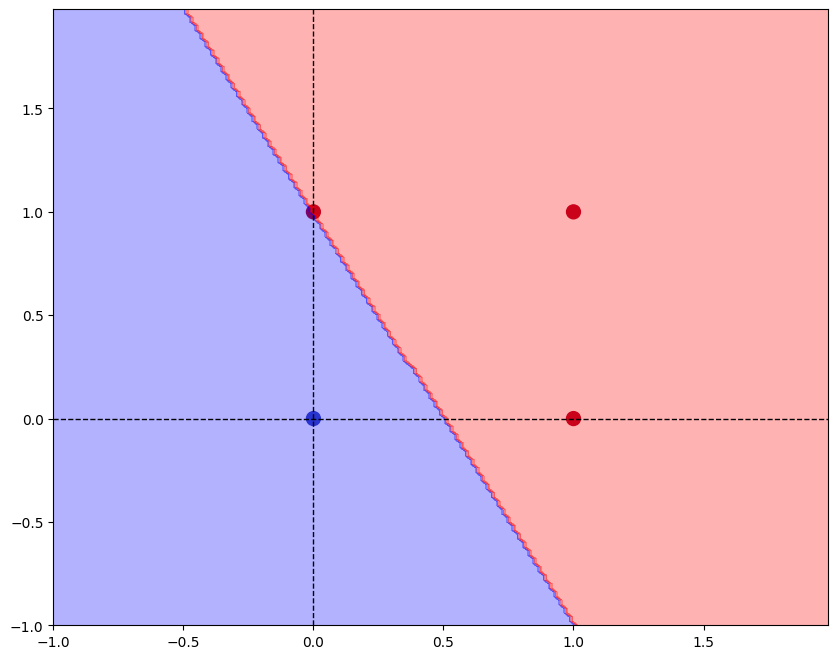

In [ ]:
save_plot(df_OR, model_or, filename="or_decision_boundry.png", plot_dir="plots", show_plot=True)

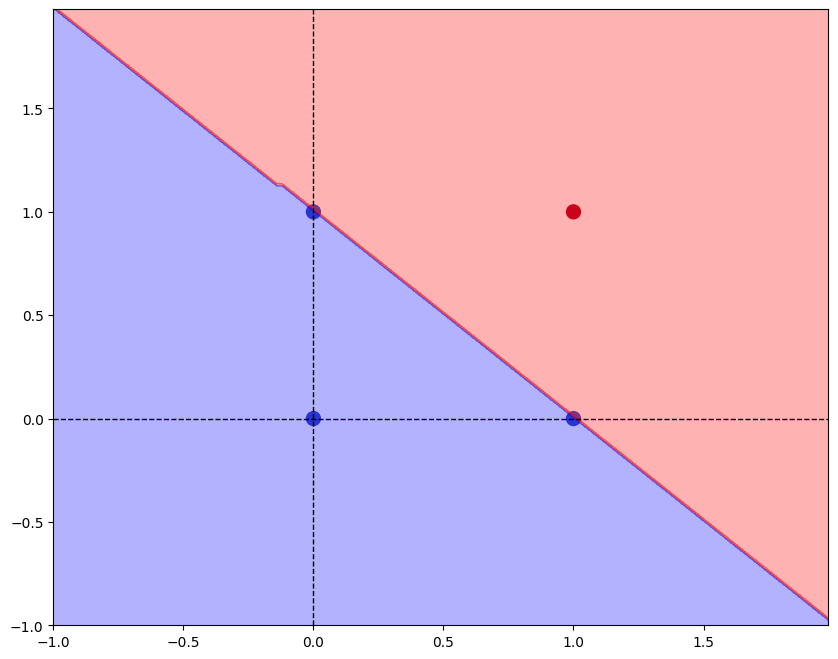

In [ ]:
save_plot(df_AND, model_and, filename="and_decision_boundry.png", plot_dir="plots", show_plot=True)